# Perceptron Implementation

## Purpose/Explanation

The purpose of this notebook is to implement a basic perceptron model in PyTorch.

A perceptron is simply a single layer neutral network that takes in multiple input values (or one input layer) and outputs a single output corresponding to one of two classes (it is a binary classifier). 

Perceptron process:

1. It takes multiple input values
2. It multiplies those input values by their respective weights (and adds a bias value). The weights and biases are decided earlier through training.
3. Then, it linearly combines (adds) these values, this results in a single scalar value
4. Then it takes this single value and inputs it into an activation function (such as the sigmoid function)
5. Finally it outputs this result. This result is the model's prediction regarding which of the two classes the input falls into. 

## Imports

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

##Preparing the data

We are creating a dataset that has two distinct clusters of data:

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]] # choose where we want the cluster's centers to be located
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)


#'X' is the coordinates of our generated points
# 'y' are the labels for these points, in this case there are only 2 clusters so the labels are 0 and 1

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1)) #we do this reshape for the training step because the optimizer wants the labels in this format

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

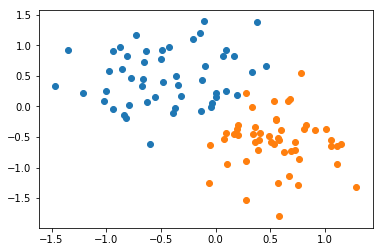

In [0]:
scatter_plot()

##Creating the model

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  
  def predict(self, x):
    pred = self.forward(x)
    if pred > 0.5:
      return 1
    else:
      return 0
    

In [0]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
def get_params():
  [w,b] = model.parameters()
  w1, w2 = w.view(2)
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/(-w2) #equation of our line where x1 is like x and x2 is like y
  plt.plot(x1, x2, 'r')
  scatter_plot()

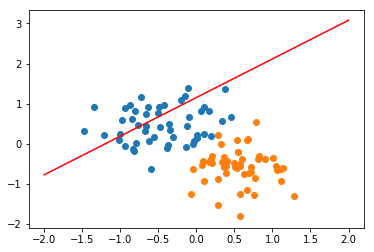

In [0]:
plot_fit("Initial")

##Training the model

In [0]:
criterion = nn.BCELoss() #binary cross entropy loss function
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # stochastic gradient descent for optimization algorithm

In [0]:
epochs = 1000 #I am not worried about overfitting for this simple problem so I am going to use more epochs than neccessary
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch: ", i)
  print("loss:", loss.item())
  
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  

epoch:  0
loss: 0.6185115575790405
epoch:  1
loss: 0.6174639463424683
epoch:  2
loss: 0.6164201498031616
epoch:  3
loss: 0.6153794527053833
epoch:  4
loss: 0.614342451095581
epoch:  5
loss: 0.6133086681365967
epoch:  6
loss: 0.6122783422470093
epoch:  7
loss: 0.6112515330314636
epoch:  8
loss: 0.6102280616760254
epoch:  9
loss: 0.6092080473899841
epoch:  10
loss: 0.6081910729408264
epoch:  11
loss: 0.6071775555610657
epoch:  12
loss: 0.606167733669281
epoch:  13
loss: 0.6051608920097351
epoch:  14
loss: 0.604157567024231
epoch:  15
loss: 0.6031574606895447
epoch:  16
loss: 0.602160632610321
epoch:  17
loss: 0.6011670827865601
epoch:  18
loss: 0.6001767516136169
epoch:  19
loss: 0.599189817905426
epoch:  20
loss: 0.5982059240341187
epoch:  21
loss: 0.5972254276275635
epoch:  22
loss: 0.5962479114532471
epoch:  23
loss: 0.5952739119529724
epoch:  24
loss: 0.5943028926849365
epoch:  25
loss: 0.5933352112770081
epoch:  26
loss: 0.5923705101013184
epoch:  27
loss: 0.5914090275764465
epoch: 

Text(0.5, 0, 'Epoch')

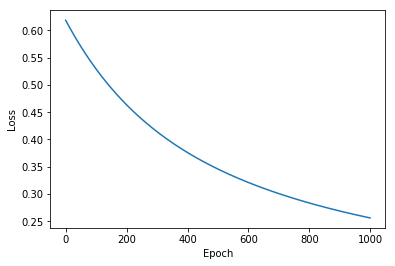

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

##Plotting the final model

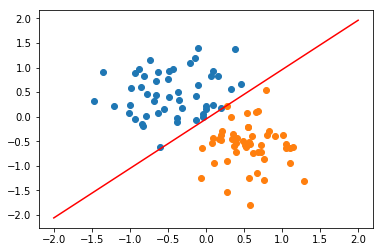

In [0]:
plot_fit("Trained model")

##Making predictions

Black point positive probability = 0.9424158334732056
Cyan point positive probability = 0.05055497586727142
Black point in class 1
Cyan point in class 0


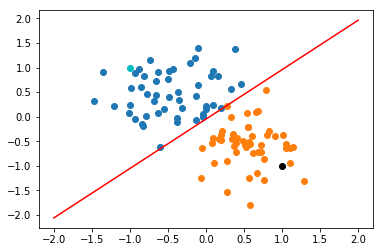

In [0]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ko')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'co')

print("Black point positive probability = {}".format(model.forward(point1).item()))
print("Cyan point positive probability = {}".format(model.forward(point2).item()))


print("Black point in class {}".format(model.predict(point1)))
print("Cyan point in class {}".format(model.predict(point2)))

plot_fit("Trained model")